In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("car_data.csv")
df = df[['Selling Price', 'Kilometers Driven', 'Year', 'Car Condition', 'Fuel Type', 'Transmission']]
df = df.dropna()
df = pd.get_dummies(df, columns=['Fuel Type', 'Transmission'], drop_first=True)

X = df.drop('Selling Price', axis=1)
y = df['Selling Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_ridge = Ridge(alpha=1.0)

model_lr.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

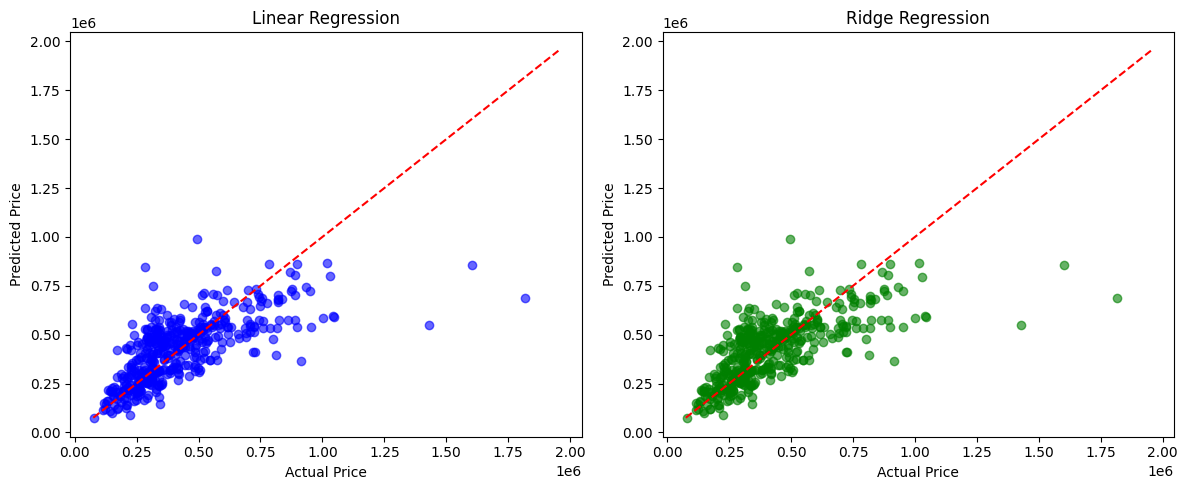

R2 Score (Linear): 0.47877207297247326
MSE (Linear): 24104359606.242195
R2 Score (Ridge): 0.4788453710972458
MSE (Ridge): 24100969909.976192

Coefficient Comparison:
                   Feature  LinearRegression         Ridge
0        Kilometers Driven       2617.738198   2614.348346
1                     Year      96174.747483  96092.597783
2            Car Condition      27265.776654  27307.479341
3         Fuel Type_Petrol     -77948.227961 -77889.661009
4   Fuel Type_Petrol + CNG     -50740.268407 -50689.099821
..                     ...               ...           ...
58       Transmission_TS08      -7217.726904  -7205.531897
59       Transmission_TS09       4743.299030   4747.215421
60       Transmission_UP14       2589.031028   2596.123962
61       Transmission_UP32      -1982.291718  -1974.223886
62       Transmission_UP78      -4338.441861  -4333.904962

[63 rows x 3 columns]


In [2]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression")

plt.tight_layout()
plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'LinearRegression': model_lr.coef_,
    'Ridge': model_ridge.coef_
})

print("R2 Score (Linear):", r2_score(y_test, y_pred_lr))
print("MSE (Linear):", mean_squared_error(y_test, y_pred_lr))
print("R2 Score (Ridge):", r2_score(y_test, y_pred_ridge))
print("MSE (Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("\nCoefficient Comparison:")
print(coef_df)
